<div style="text-align: center; font-size: 20px; font-weight: bold;">
    Name: Hamid El Messaoudi  
    <br>
    Date: 11/3/2024  
    <br>
    Program: Complete Data Preprocessing Workflow for Fraud Detection
</div>


In [55]:
# Importing the basic libraries we need for data manipulation and analysis
import pandas as pd
import numpy as np

In [56]:
# Installing necessary packages (only run if not installed)
!python -m pip install --upgrade pip
!pip install sklearn_pandas xgboost

In [57]:
# Reading the dataset
data = pd.read_csv('insuranceFraud.csv')

In [58]:
# Having a look at the data
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [59]:
# Replacing all the "?" values with NaN to make them easier to handle
data = data.replace('?', np.nan)

In [60]:
# list of columns not necessary for pfrediction
cols_to_drop=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

In [61]:
# dropping the unnecessary columns
data.drop(columns=cols_to_drop,inplace=True)

In [62]:
# checking the data after dropping the columns
data.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NaN,0,0,NaN,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NaN,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [63]:
# checking for missing values
data.isna().sum()

months_as_customer               0
age                              0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

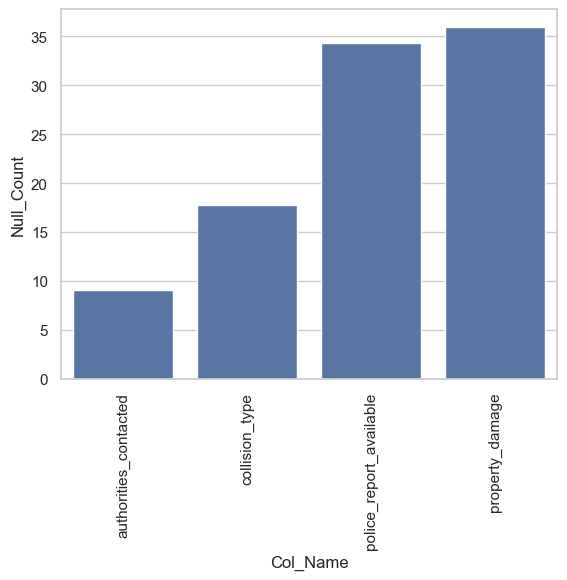

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
missing = data.isnull().mean() * 100  # percentage
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing = missing.to_frame()
missing.columns = ['Null_Count']
missing.index.names = ['Col_Name']
missing = missing.reset_index()

sns.set(style='whitegrid', color_codes=True)
sns.barplot(x='Col_Name', y='Null_Count', data=missing)
plt.xticks(rotation=90)
plt.show()

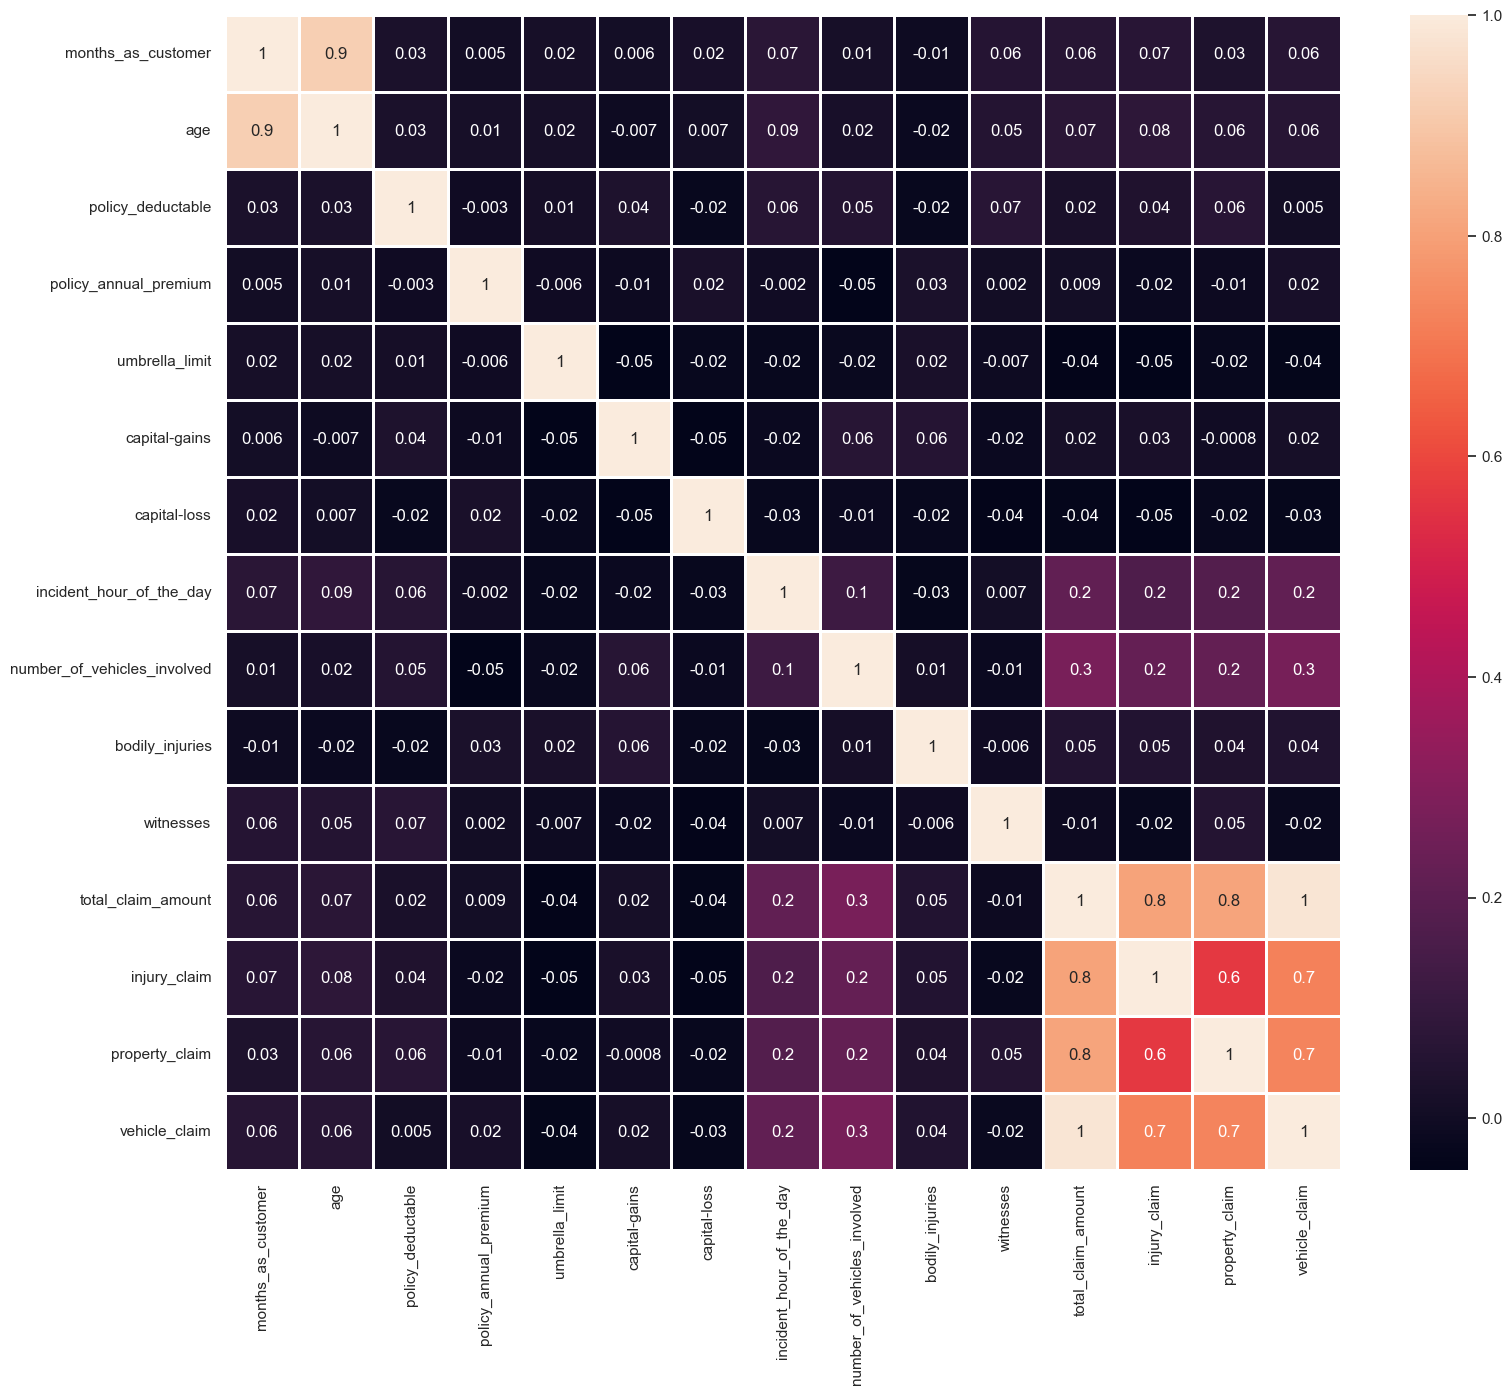

In [65]:
# Set the figure size for the correlation heatmap
plt.figure(figsize=(18, 15))

# Calculate the correlation matrix for numerical columns in the data
corr = data.select_dtypes(include=['number']).corr()

# Plot the heatmap of the correlation matrix with annotations and specified formatting
sns.heatmap(data=corr, annot=True, fmt='.1g', linewidth=2)

# Display the plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

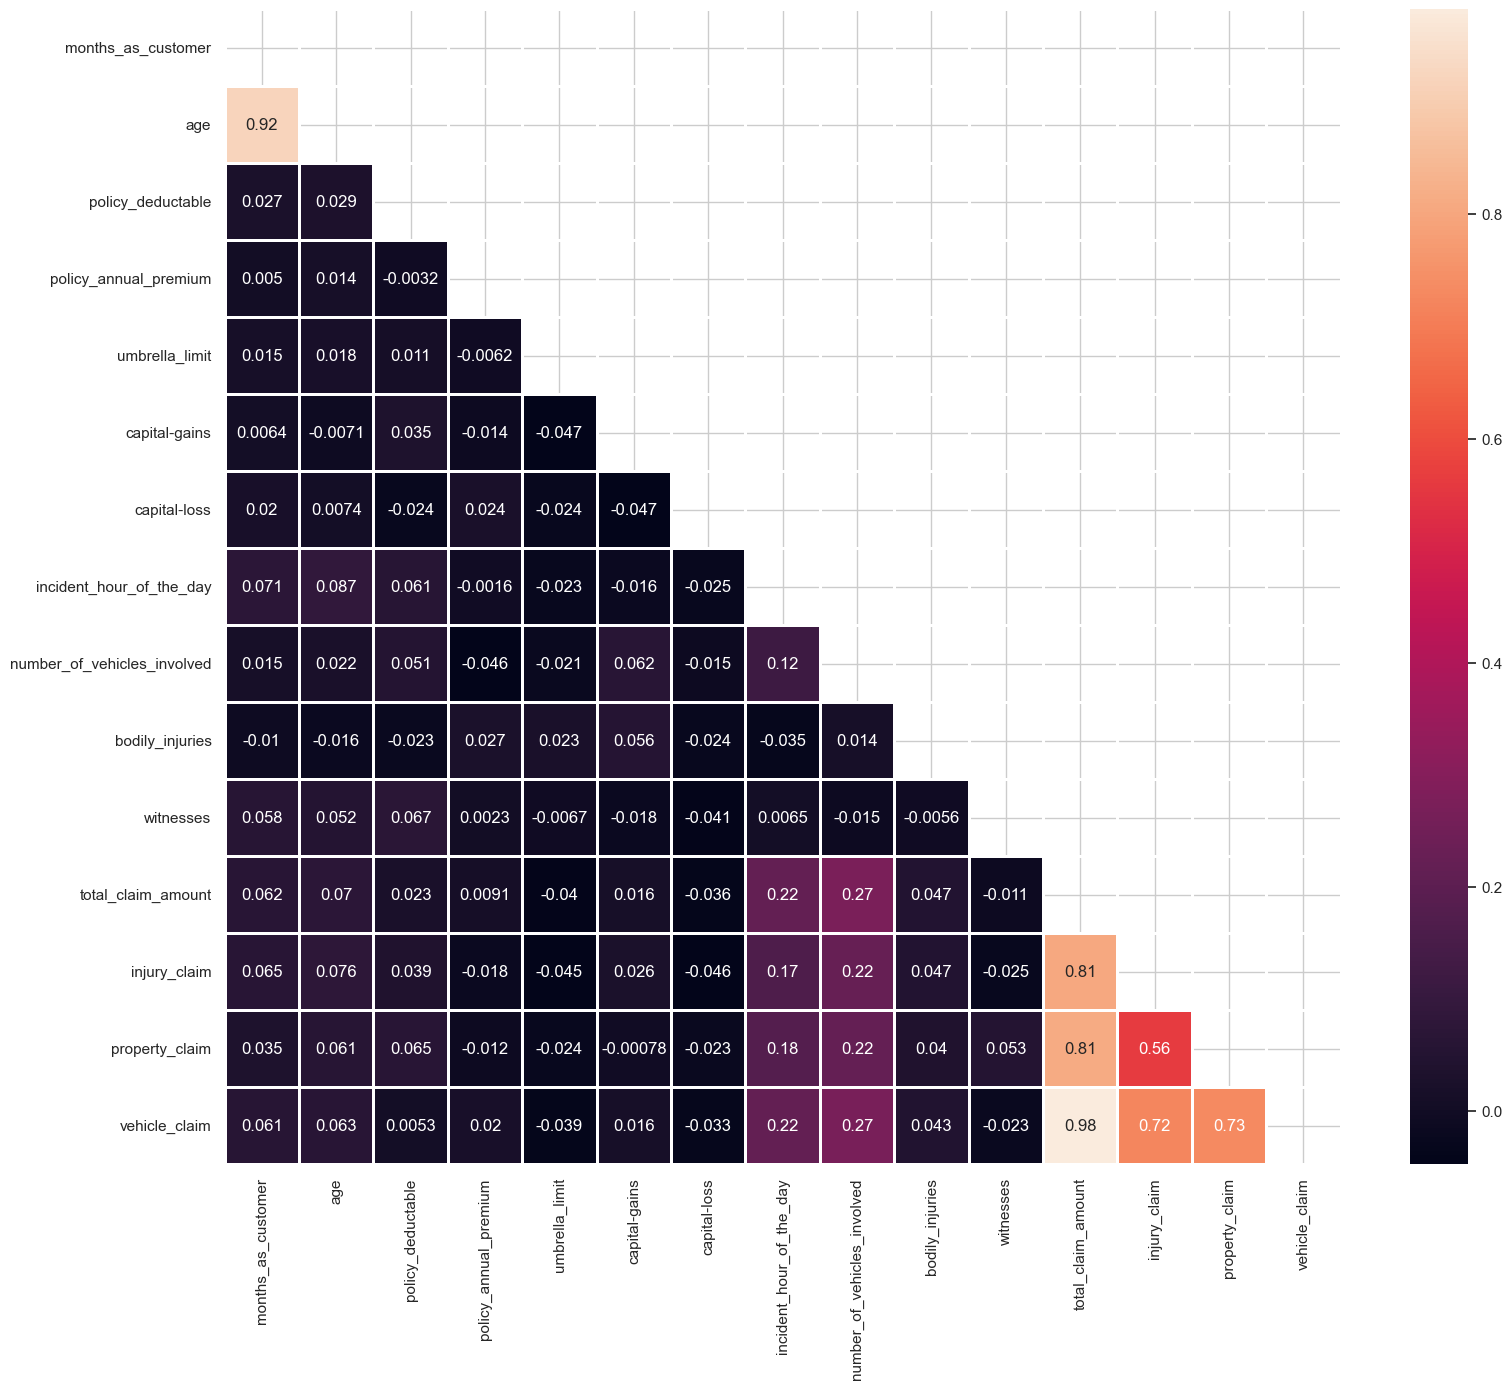

In [66]:
# Checking if any of our numerical features are strongly related to each other (aka, correlated).
# If two features are super similar, we might not need both. 
# This just gives us a sense of what’s related in our data.
plt.figure(figsize = (18,15))
corr = data.select_dtypes(include=['number']).corr()
mask = np.triu(np.ones_like(corr,dtype =bool))

sns.heatmap(data =corr, mask = mask, annot = True, fmt ='.2g', linewidth =1)
plt.show

In [67]:
data.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)
data.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NaN,0,0,NaN,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NaN,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


<function matplotlib.pyplot.show(close=None, block=None)>

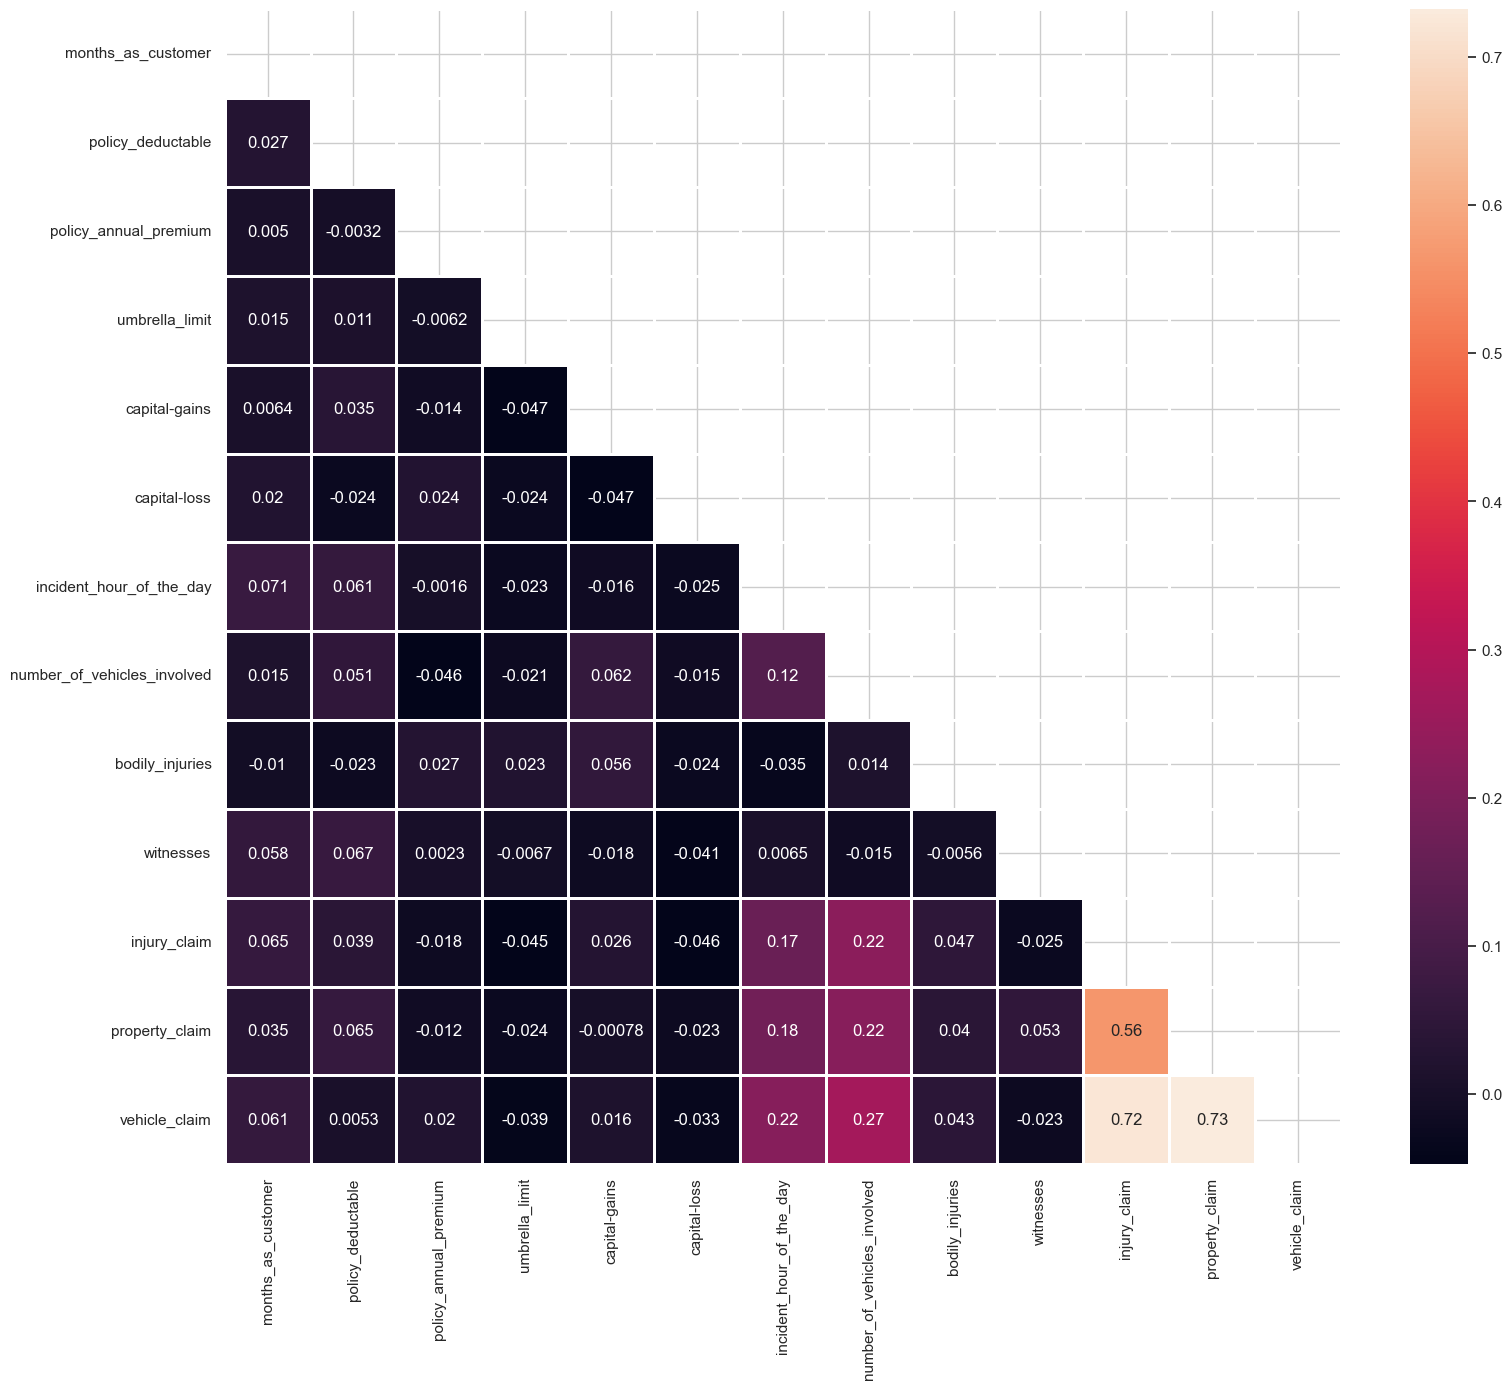

In [68]:
plt.figure(figsize = (18,15))
corr = data.select_dtypes(include=['number']).corr()
mask = np.triu(np.ones_like(corr,dtype =bool))

sns.heatmap(data =corr, mask = mask, annot = True, fmt ='.2g', linewidth =1)
plt.show

In [69]:
# Importing SimpleImputer from sklearn
from sklearn.impute import SimpleImputer

# Creating an imputer instance to fill missing values with the most frequent value in each column
imputer = SimpleImputer(strategy='most_frequent')

# Imputing missing values for specific categorical columns
data['collision_type'] = imputer.fit_transform(data[['collision_type']]).ravel()
data['property_damage'] = imputer.fit_transform(data[['property_damage']]).ravel()
data['police_report_available'] = imputer.fit_transform(data[['police_report_available']]).ravel()


In [70]:
# As the columns which have missing values, they are only categorical, we'll use the categorical imputer
# Importing the categorical imputer
from sklearn.impute import SimpleImputer

# Create an imputer instance for categorical columns
imputer = SimpleImputer(strategy='most_frequent')

In [71]:
# Imputing missing values for each categorical column
data['collision_type'] = imputer.fit_transform(data[['collision_type']]).ravel()
data['property_damage'] = imputer.fit_transform(data[['property_damage']]).ravel()
data['police_report_available'] = imputer.fit_transform(data[['police_report_available']]).ravel()


In [72]:
# Extracting the categorical columns
cat_df = data.select_dtypes(include=['object']).copy()

In [73]:
cat_df.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [74]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO,Y
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO,Y
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,NaN,NO,NO,N


In [75]:
cat_df.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [76]:
cat_df['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [77]:
cat_df['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [78]:
cat_df['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [79]:
cat_df['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

In [80]:
cat_df['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

In [81]:
cat_df['collision_type'].unique()

array(['Side Collision', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [82]:
cat_df['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [83]:
cat_df['authorities_contacted'].unique()

array(['Police', nan, 'Fire', 'Other', 'Ambulance'], dtype=object)

In [84]:
cat_df['property_damage'].unique()

array(['YES', 'NO'], dtype=object)

In [85]:
cat_df['police_report_available'].unique()

array(['YES', 'NO'], dtype=object)

In [86]:
cat_df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [87]:
# custom mapping for encoding
cat_df['policy_csl'] = cat_df['policy_csl'].map({'100/300' : 1, '250/500' : 2.5 ,'500/1000':5})
cat_df['insured_education_level'] = cat_df['insured_education_level'].map({'JD' : 1, 'High School' : 2,'College':3,'Masters':4,'Associate':5,'MD':6,'PhD':7})
cat_df['incident_severity'] = cat_df['incident_severity'].map({'Trivial Damage' : 1, 'Minor Damage' : 2,'Major Damage':3,'Total Loss':4})
cat_df['insured_sex'] = cat_df['insured_sex'].map({'FEMALE' : 0, 'MALE' : 1})
cat_df['property_damage'] = cat_df['property_damage'].map({'NO' : 0, 'YES' : 1})
cat_df['police_report_available'] = cat_df['police_report_available'].map({'NO' : 0, 'YES' : 1})
cat_df['fraud_reported'] = cat_df['fraud_reported'].map({'N' : 0, 'Y' : 1})

In [88]:
# auto encoding of categorical variables
for col in cat_df.drop(columns=['policy_csl','insured_education_level','incident_severity','insured_sex','property_damage','police_report_available','fraud_reported']).columns:
    cat_df= pd.get_dummies(cat_df, columns=[col], prefix = [col], drop_first=True)

In [89]:
# Converting any True/False values to 1/0 to make all data numeric
cat_df = cat_df.applymap(lambda x: int(x) if isinstance(x, bool) else x)

C:\Users\hamid\AppData\Local\Temp\ipykernel_29924\720693957.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cat_df = cat_df.applymap(lambda x: int(x) if isinstance(x, bool) else x)


In [90]:
# data after encoding
cat_df.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,...,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police
0,2.5,1,6,3,1,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
1,2.5,1,6,2,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,1
2,1.0,0,7,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2.5,0,7,3,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
4,5.0,1,5,2,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0


In [91]:
# data after encoding
cat_df.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,...,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police
0,2.5,1,6,3,1,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
1,2.5,1,6,2,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,1
2,1.0,0,7,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2.5,0,7,3,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
4,5.0,1,5,2,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0


In [92]:
# extracting the numerical columns
num_df = data.select_dtypes(include=['int64']).copy()

In [93]:
num_df.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim'],
      dtype='object')

In [94]:
num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [95]:
# combining the Numerical and categorical dataframes to get the final dataset
final_df=pd.concat([num_df,cat_df], axis=1)

In [96]:
final_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police
0,328,1000,0,53300,0,5,1,1,2,6510,...,0,0,0,1,0,0,1,0,0,1
1,228,2000,5000000,0,0,8,1,0,0,780,...,0,0,0,0,1,1,0,0,0,1
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,0,0,0,0,0,1,0,0,0,1
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,1,0,0,1,0,0,0,0,0,1
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,1,0,0,0,1,1,0,0,0,0


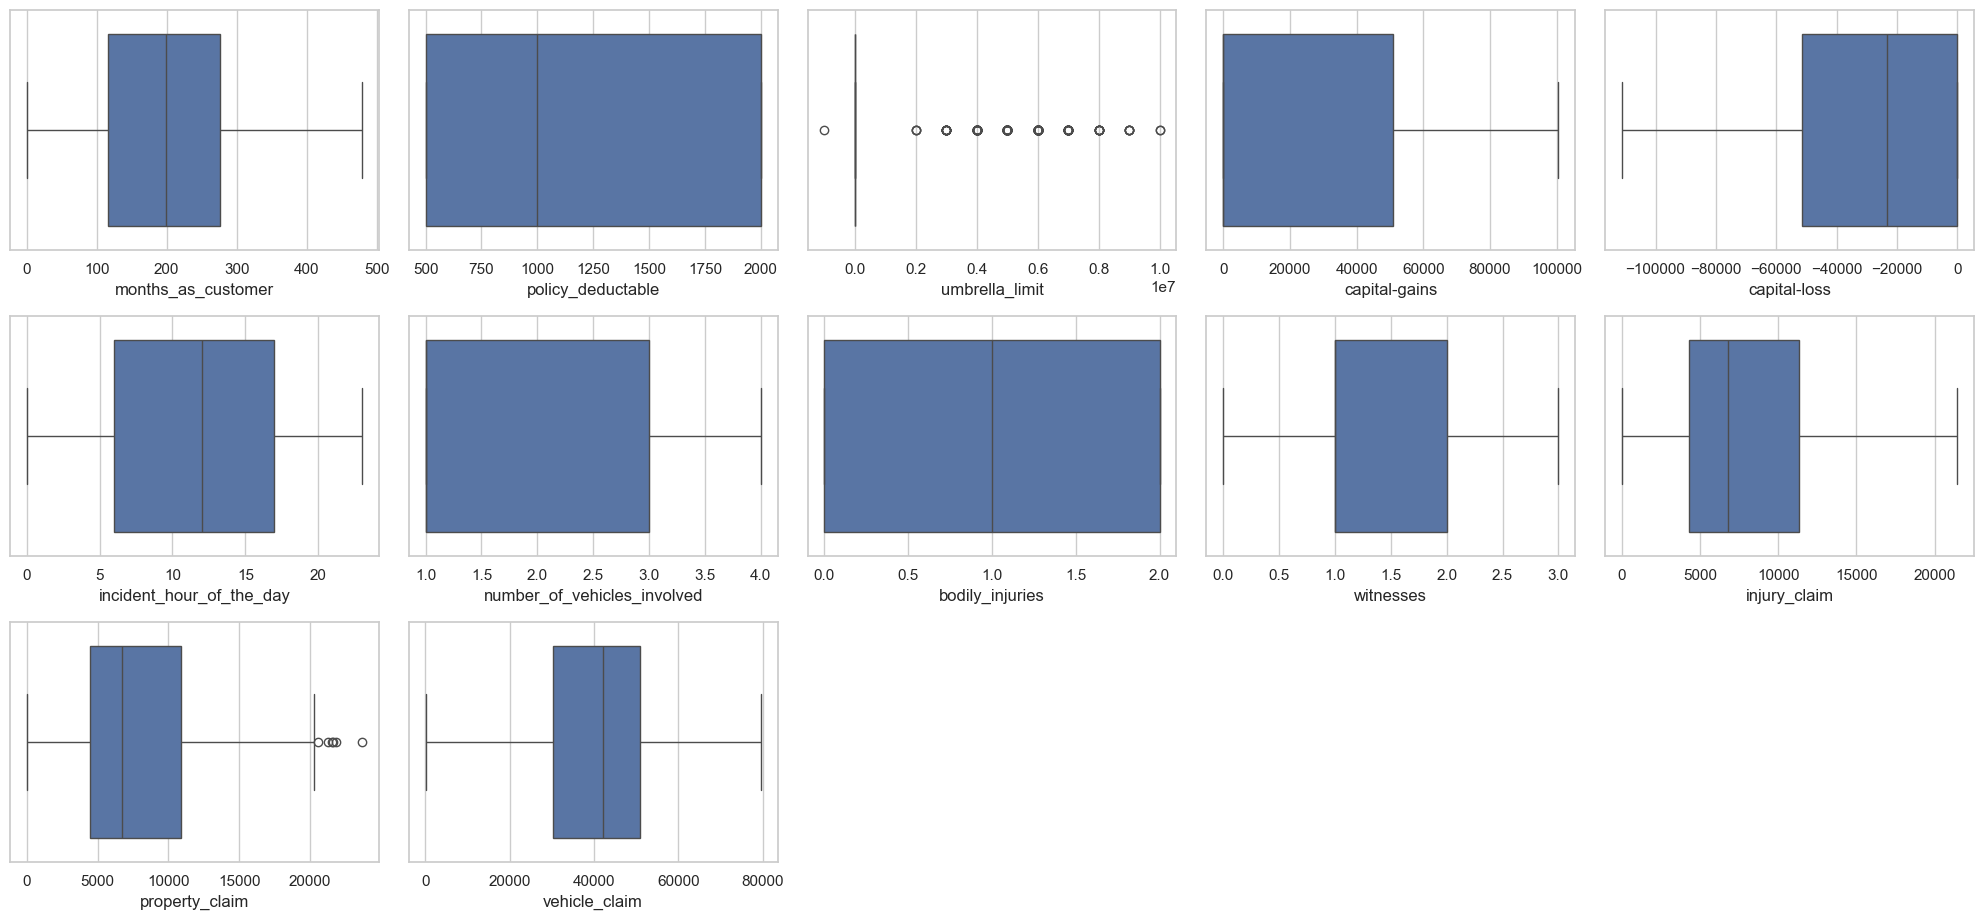

In [97]:
# Checking for outliers in numerical columns

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
plot_number = 1

for col in num_df.columns:
    if plot_number <= 24:  # Limiting to 24 plots for readability
        ax = plt.subplot(5, 5, plot_number)  # Creating a 5x5 grid of boxplots
        sns.boxplot(x=num_df[col], ax=ax)
        plt.xlabel(col, fontsize=12)
        plot_number += 1

plt.tight_layout()
plt.show()


In [98]:

# Checking for potential outliers using IQR, without removing them yet
outliers_summary = {}

for col in num_df:
    Q1 = final_df[col].quantile(0.25)
    Q3 = final_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = final_df[(final_df[col] < lower_bound) | (final_df[col] > upper_bound)].shape[0]
    
    # Storing summary information
    outliers_summary[col] = {
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outliers Count": outliers_count
    }

# Displaying the outliers summary
pd.DataFrame(outliers_summary).T


,Lower Bound,Upper Bound,Outliers Count
months_as_customer,-125.0,517.0,0.0
policy_deductable,-1750.0,4250.0,0.0
umbrella_limit,0.0,0.0,202.0
capital-gains,-76537.5,127562.5,0.0
capital-loss,-128750.0,77250.0,0.0
incident_hour_of_the_day,-10.5,33.5,0.0
number_of_vehicles_involved,-2.0,6.0,0.0
bodily_injuries,-3.0,5.0,0.0
witnesses,-0.5,3.5,0.0
injury_claim,-6220.0,21820.0,0.0


In [99]:

# Cap outliers based on IQR bounds
for col in ['umbrella_limit', 'property_claim', 'vehicle_claim']:
    Q1 = final_df[col].quantile(0.25)
    Q3 = final_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Apply capping
    final_df[col] = np.where(final_df[col] < lower_bound, lower_bound, final_df[col])
    final_df[col] = np.where(final_df[col] > upper_bound, upper_bound, final_df[col])

print("Outliers have been capped to IQR bounds.")


Outliers have been capped to IQR bounds.


In [100]:
# Checking for outliers again after capping
outliers_summary = {}

for col in ['umbrella_limit', 'property_claim', 'vehicle_claim']:
    Q1 = final_df[col].quantile(0.25)
    Q3 = final_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = final_df[(final_df[col] < lower_bound) | (final_df[col] > upper_bound)].shape[0]
    
    # Storing summary information
    outliers_summary[col] = {
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outliers Count": outliers_count
    }

# Displaying the outliers summary after capping
pd.DataFrame(outliers_summary).T


,Lower Bound,Upper Bound,Outliers Count
umbrella_limit,0.0,0.0,0.0
property_claim,-5215.0,20545.0,0.0
vehicle_claim,-502.5,81617.5,0.0


In [101]:
# Define num_df to include only numerical columns
num_df = final_df.select_dtypes(include=[np.number]).columns


In [102]:
# Apply Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
final_df[num_df] = scaler.fit_transform(final_df[num_df])

print("Feature scaling (Min-Max) applied to numerical columns.")

Feature scaling (Min-Max) applied to numerical columns.


In [103]:
# Check min and max after scaling
print(final_df[num_df].describe().loc[['min', 'max']])


     months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
min                 0.0                0.0             0.0            0.0   
max                 1.0                1.0             0.0            1.0   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
min           0.0                       0.0                          0.0   
max           1.0                       1.0                          1.0   

     bodily_injuries  witnesses  injury_claim  ...  \
min              0.0        0.0           0.0  ...   
max              1.0        1.0           1.0  ...   

     insured_relationship_unmarried  insured_relationship_wife  \
min                             0.0                        0.0   
max                             1.0                        1.0   

     incident_type_Parked Car  incident_type_Single Vehicle Collision  \
min                       0.0                                     0.0   
max                       1.0  

**Summary: Ready for Export and Next Steps**

Alright, our data is now fully prepped! We've taken care of:

- **Handling missing values**: Replaced missing values to ensure consistency.
- **Encoding categorical variables**: Converted categorical data to numerical format so models can work with it.
- **Outlier treatment**: Capped extreme values to keep our data balanced.
- **Feature scaling**: Standardized the numerical columns to a [0, 1] range for smoother model performance.

Now we’re ready to export this cleaned and processed DataFrame to a CSV file. This exported file will be our finalized dataset, and here’s what we can do with it next:

1. **Training and Testing**: Use this file to split the data into training and test sets for building and evaluating our machine learning models.
2. **Deployment**: Since the data is clean, standardized, and model-ready, we can also use this same file in deployment for real-world predictions.


In [104]:
data.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [105]:
# Exporting the final cleaned and preprocessed data to a CSV file
final_df.to_csv('insuranceFraud_final_processed_data.csv', index=False)
print("Data exported to 'insuranceFraud_final_processed_data.csv' successfully!")

Data exported to 'insuranceFraud_final_processed_data.csv' successfully!
